## Business Value: Reduce churn, improve retention.
## Dataset: Telco Customer Churn from Kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("D:\projects\python\Telco_Customer_Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#As totalcharges is object datatype we have to convert into numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [10]:
#Dropping the customerid column as it not useful for the analysis
df.drop('customerID', axis=1, inplace=True)

## Feature engineering

In [11]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12'
    elif tenure <= 24:
        return '12-24'
    elif tenure <= 48:
        return '24-48'
    else:
        return '48+'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [12]:
# a binary flag indicating long tenure customers
df['IsLongTermCustomer'] = df['tenure'].apply(lambda x: 1 if x >= 60 else 0)

In [13]:
# Total number of value-added services subscribed (e.g., security, backup, streaming)
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

df['ServiceCount'] = df[service_cols].replace({'Yes': 1, 'No': 0,'No internet service': 0}).sum(axis=1)

In [14]:
# flag for high spenders
df['HighMonthlyCharges'] = df['MonthlyCharges'].apply(lambda x: 1 if x > 70 else 0)

## Visual Insights

Text(0.5, 1.0, 'Customer Churn Count')

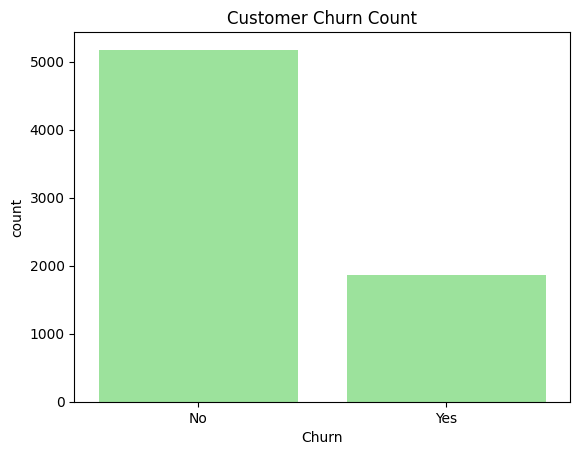

In [15]:
# Churn distribution
sns.countplot(x='Churn', data=df, color='lightgreen')
plt.title('Customer Churn Count')

In [16]:
# This gives that 28.57% of total customers are churning out

Text(0, 0.5, 'Number of Customers')

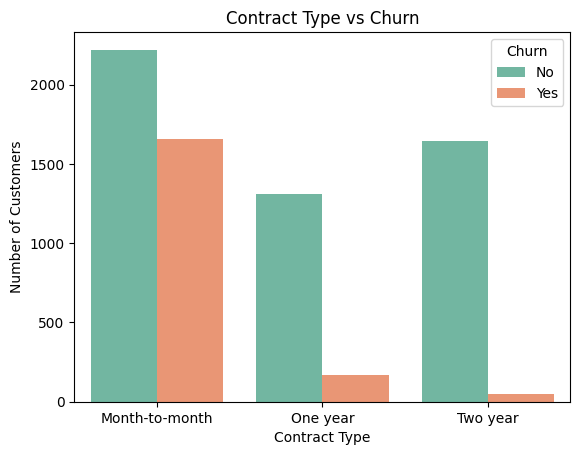

In [17]:
#churn vs contract
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

In [18]:
#this shows that churning in the month to month contract type is far more than the other contract type

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

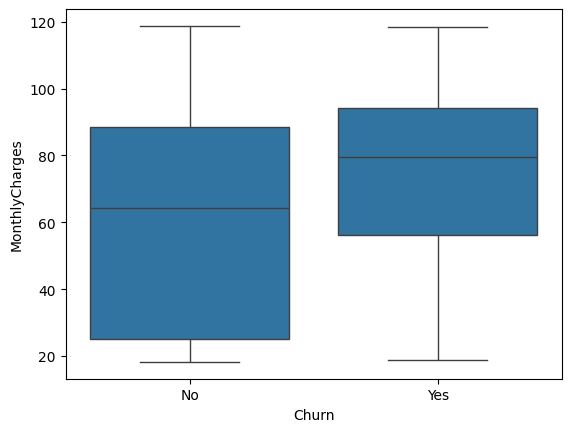

In [19]:
#monthly charges distribution by churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


In [20]:
# The median of the monthly charges for churn = yes is higher that means that customers with higher bills are most likely to leave

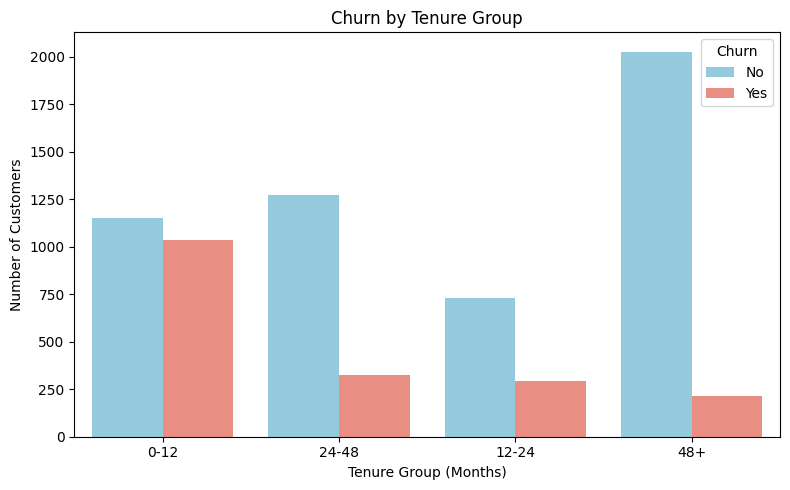

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TenureGroup', hue='Churn', data=df, palette={'No': 'skyblue', 'Yes': 'salmon'})
plt.title('Churn by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [22]:
#This shows that people with tenure less than an year are highly likely to leave

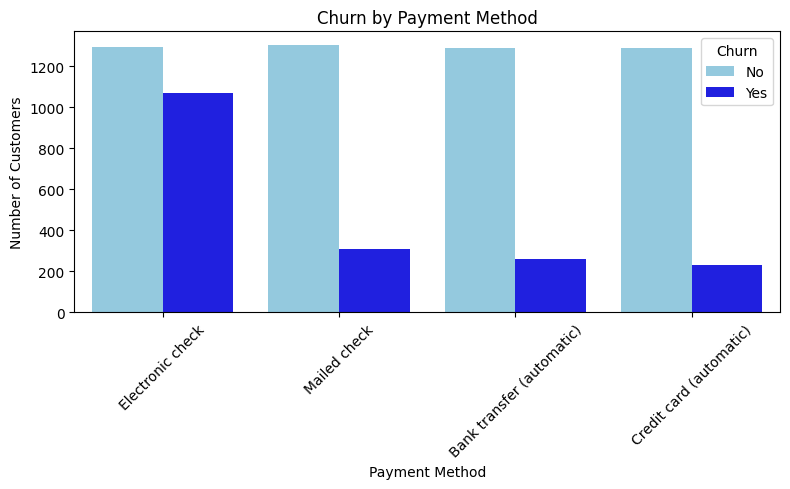

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette={'No': 'skyblue', 'Yes': 'blue'})
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [24]:
#Customers with electronic check as payment are leaving the most as compared to other payment methods

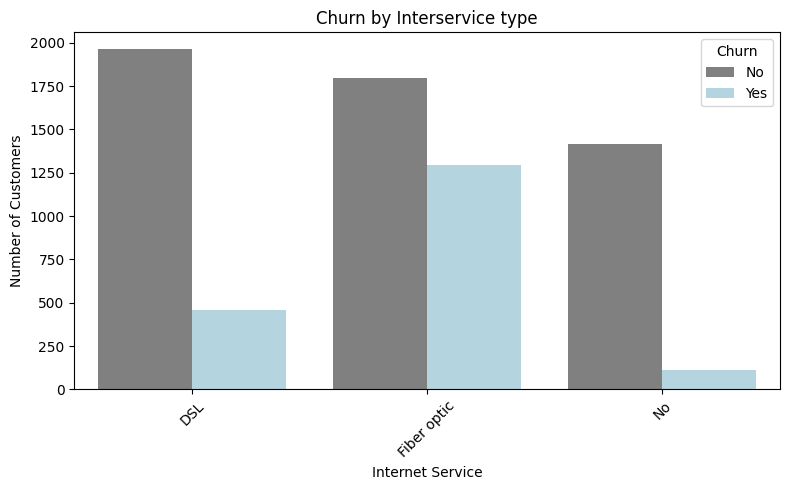

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette={'No': 'grey', 'Yes': 'lightblue'})
plt.xticks(rotation=45)
plt.title('Churn by Interservice type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [26]:
#the people who are using fiber optic are more likely to churn

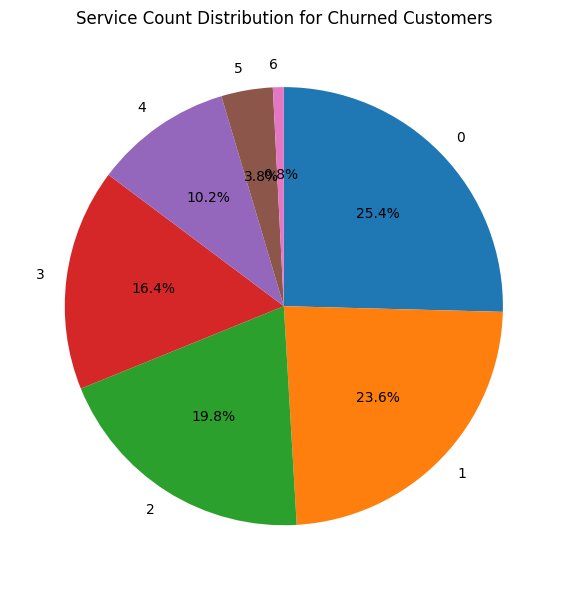

In [39]:
# Filter data where Churn is 'Yes'
churn_yes = df[df['Churn'] == 'Yes']['ServiceCount'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_yes,
    labels=churn_yes.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('Service Count Distribution for Churned Customers')
plt.tight_layout()
plt.show()

In [ ]:
#This shows that the count of services is inversely proportional to customer churning. the more the service count the
#less likely the customer is less likely to churn


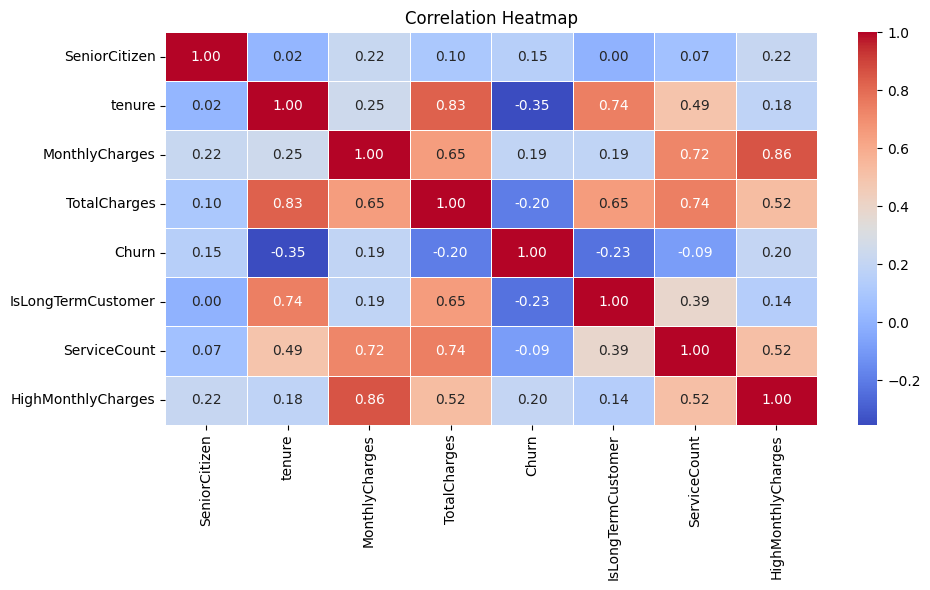

In [40]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [28]:
# Senior citizen are slighty more likely to churn
# More monthly charges then customer likely to churn
# More the number of services the customer is less likely to churn

## Actionable Suggestions

### Set a target churn reduction goal (e.g., reduce to 20%) and launch retention campaigns
### Offer incentives or discounts for long-term contracts, e.g., 6-month or annual plans with benefits.
### Encourage digital payments (credit card, auto-pay) through incentives or ease-of-use campaigns.
### Investigate fiber optic service quality or pricing issues.
### Promote bundled service packages (e.g., phone + internet + TV) to increase customer stickiness.
### Tailor senior-friendly plans (easy support, larger fonts, fewer add-ons), and offer dedicated support lines.
### Give customers flexibility to modify their plans before they churn.
